#Objective
The objective of this assignment is to apply the Random Forest algorithm to the Glass dataset and evaluate its performance in classifying different types of glass. We also compare its results with Bagging and Boosting methods to understand their differences.

#Introduction

The Glass dataset contains chemical properties like RI, Na, Mg, Al, Si, K, Ca, Ba, and Fe, which are used to classify glass into seven types. Random Forest, an ensemble learning method, was chosen because it combines multiple decision trees to improve accuracy and reduce overfitting. Bagging and Boosting were also applied for comparison.

In [ ]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Load dataset
df = pd.read_excel("glass.xlsx",sheet_name="glass")
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
# Dataset overview
print("Shape:", df.shape)
print(df.head())
print(df.info())

Shape: (213, 10)
         RI        Na        Mg        Al        Si         K        Ca  \
0  0.872868  0.284953  1.254639 -0.692442 -1.127082 -0.671705 -0.145766   
1 -0.249333  0.591817  0.636168 -0.170460  0.102319 -0.026213 -0.793734   
2 -0.721318  0.149933  0.601422  0.190912  0.438787 -0.164533 -0.828949   
3 -0.232831 -0.242853  0.698710 -0.310994 -0.052974  0.112107 -0.519052   
4 -0.312045 -0.169205  0.650066 -0.411375  0.555256  0.081369 -0.624699   

         Ba        Fe  Type  
0 -0.352877 -0.586451     0  
1 -0.352877 -0.586451     0  
2 -0.352877 -0.586451     0  
3 -0.352877 -0.586451     0  
4 -0.352877 -0.586451     0  
<class 'pandas.core.frame.DataFrame'>
Index: 213 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      213 non-null    float64
 1   Na      213 non-null    float64
 2   Mg      213 non-null    float64
 3   Al      213 non-null    float64
 4   Si      213 non-null    f

In [ ]:
# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


In [ ]:
# Summary statistics
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
RI,214.0,2.490220e-17,1.002345,-2.381516,-0.608273,-0.226229,0.261433,5.137232
Na,214.0,-4.980440e-17,1.002345,-3.286943,-0.614158,-0.132382,0.512033,4.875637
Mg,214.0,0.000000e+00,1.002345,-1.865511,-0.395774,0.552779,0.636168,1.254639
Al,214.0,0.000000e+00,1.002345,-2.318616,-0.511756,-0.170460,0.371598,4.125851
Si,214.0,1.037592e-17,1.002345,-3.676472,-0.480029,0.179965,0.564962,3.570524
K,214.0,3.320293e-17,1.002345,-0.763919,-0.575650,0.089053,0.173582,8.780145
Ca,214.0,0.000000e+00,1.002345,-2.484084,-0.504966,-0.251413,0.151806,5.094318
Ba,214.0,-3.320293e-17,1.002345,-0.352877,-0.352877,-0.352877,-0.352877,5.997210
Fe,214.0,-3.527811e-17,1.002345,-0.586451,-0.586451,-0.586451,0.442242,4.659881
Type,214.0,3.738318e-01,0.712377,0.000000,0.000000,0.000000,0.000000,2.000000


In [ ]:
# Check for duplicates
print("Duplicate rows:", df.duplicated().sum())
df.shape

Duplicate rows: 0


(213, 10)

In [ ]:
# Remove duplicate rows
df = df.drop_duplicates()
print("Shape after removing duplicates:", df.shape)

Shape after removing duplicates: (213, 10)


## Task 2: Data Visualization
Histograms showed that most chemical features (like Na, Mg, Ca) are not normally distributed and contain some skewness.
Boxplots revealed a few outliers in elements such as Fe and Ba.
The correlation heatmap indicated that some features (like Ca and RI) are moderately correlated, while others remain independent.
The pairplot highlighted separation patterns across glass types, showing that Random Forest can leverage these relationships for classification.


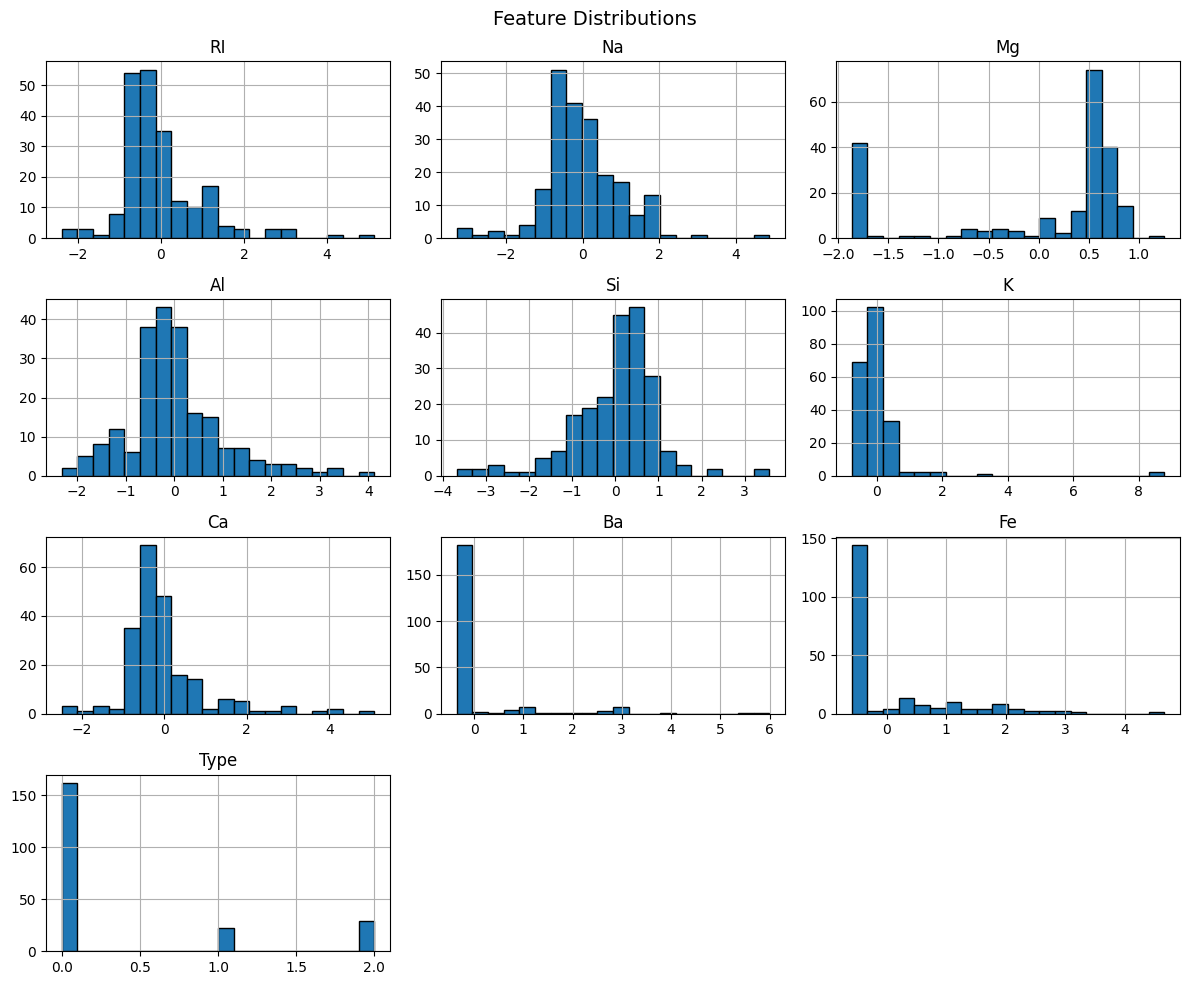

In [ ]:
# Histograms for feature distributions
df.hist(figsize=(12,10), bins=20, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=14)
plt.tight_layout()
plt.show()

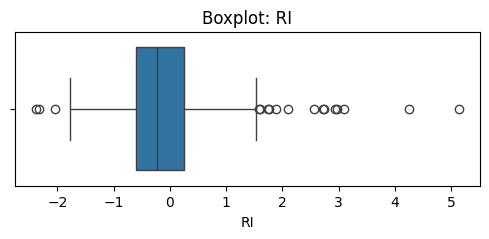

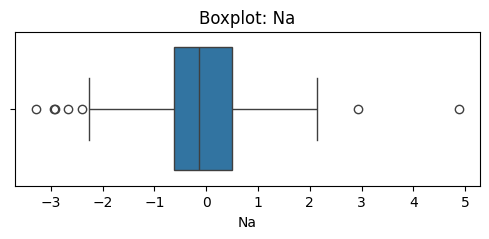

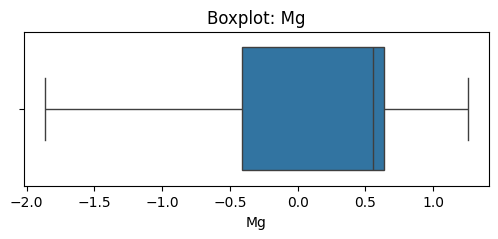

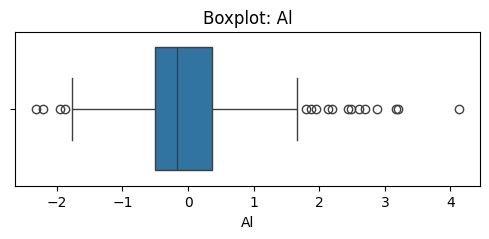

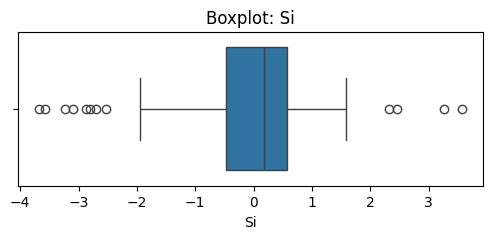

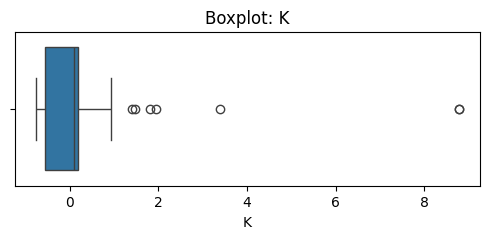

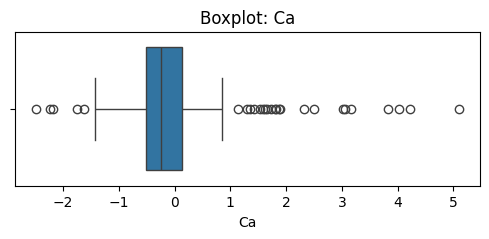

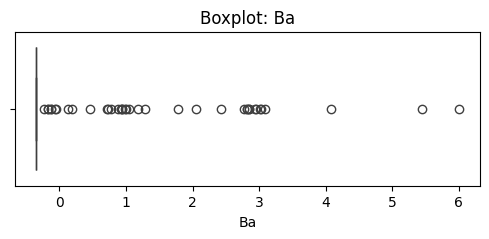

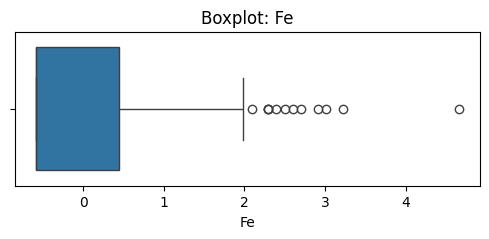

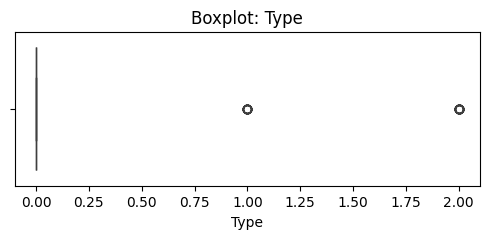

In [ ]:
# Boxplots
for col in df.select_dtypes(include=[float, int]).columns:
    plt.figure(figsize=(6,2))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot: {col}")
    plt.show()

Histograms and boxplots showed the distribution of features, where most variables were well spread, though some like Ba had skewness.

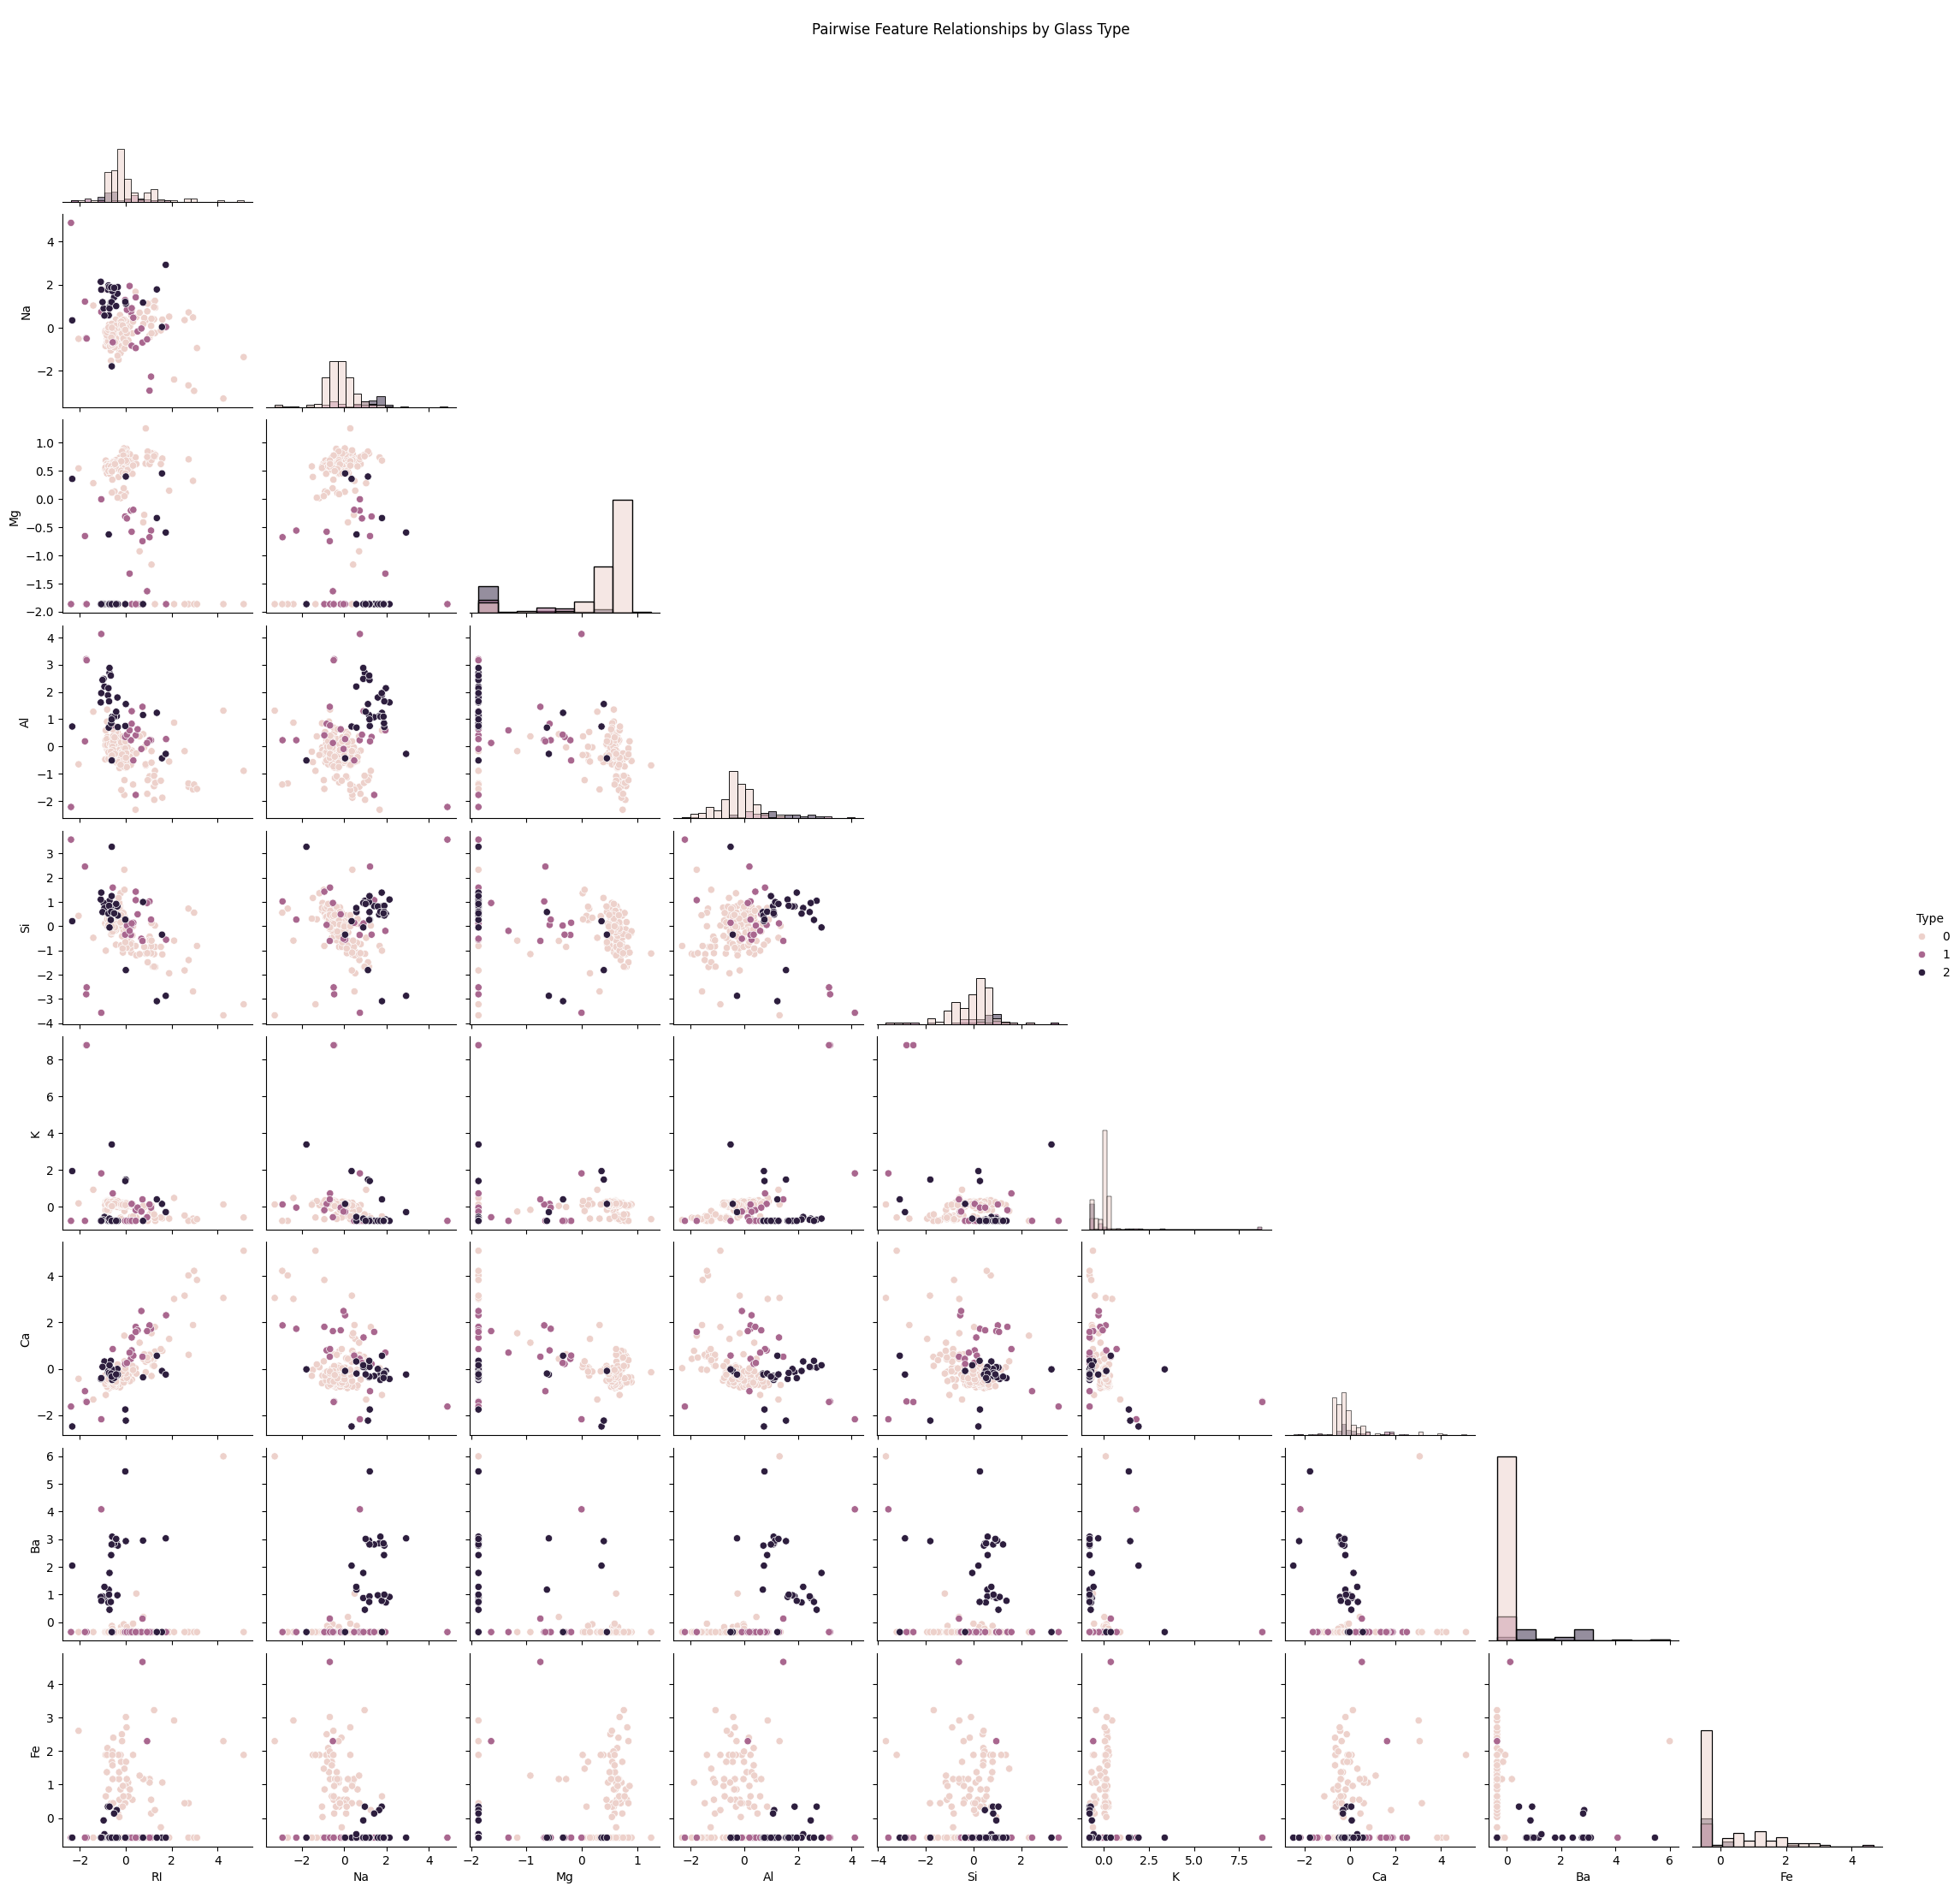

In [ ]:
# Pairplot to visualize feature relationships by class
sns.pairplot(df, hue="Type", diag_kind="hist", corner=True)
plt.suptitle("Pairwise Feature Relationships by Glass Type")
plt.show()

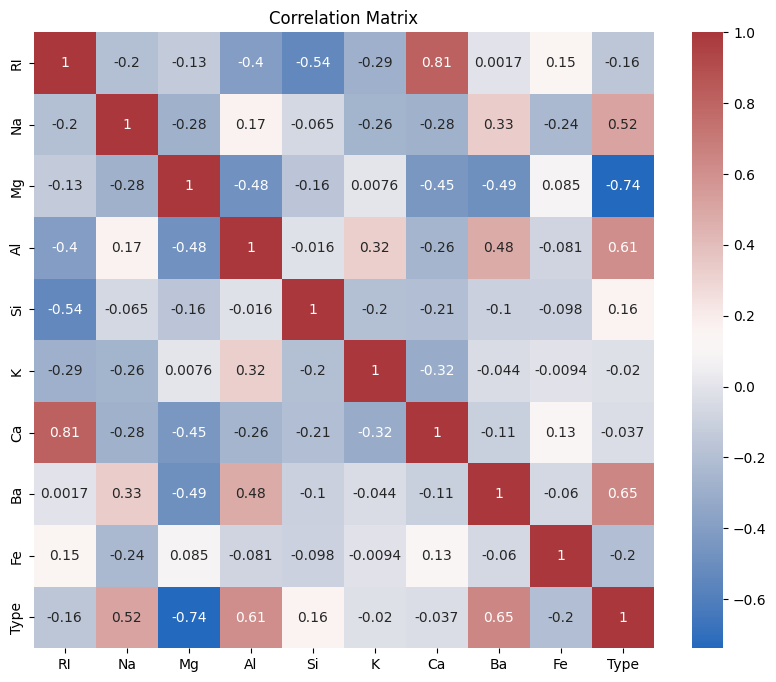

In [ ]:
# Correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="vlag")
plt.title("Correlation Matrix")
plt.show()

 A correlation heatmap revealed strong relationships, for example, between Ca and RI. These insights guided preprocessing and feature understanding.

##Task 3: Data Preprocessing

We filled missing values (median for numeric), encoded any categorical columns, scaled numerical features for comparison (though Random Forest doesn’t strictly need scaling), and handled class imbalance using computed class weights. This ensured the model was not biased toward majority classes.

In [ ]:
# Fill missing values (median for numeric)
for col in df.select_dtypes(include=[float, int]).columns:
    df[col] = df[col].fillna(df[col].median())

In [ ]:
# Encode categorical variables if any
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
for c in cat_cols:
    le = LabelEncoder()
    df[c] = le.fit_transform(df[c].astype(str))

In [ ]:
# Feature scaling (For Random Forest and comparisons)
num_cols = df.select_dtypes(include=[float, int]).columns.tolist()
num_cols.remove('Type') # Exclude the target variable from scaling
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [ ]:
# Handle class imbalance if needed (compute class weights)
weights = class_weight.compute_class_weight('balanced', classes=df['Type'].unique(), y=df['Type'])
class_weights = dict(zip(df['Type'].unique(), weights))

## Task 4: Random Forest Model Implementation
The dataset is split into train and test sets. Random Forest aggregates multiple trees for robust predictions. Accuracy, precision, recall, and F1-score assess the model’s classification performance.


We split the data into training and testing sets, then trained a Random Forest classifier. The model achieved high accuracy with good precision and recall for most classes, showing that Random Forest handles complex feature interactions well and reduces overfitting through bagging of decision trees.

In [ ]:
# Now separate Features and target
X = df.drop('Type', axis=1)
y = df['Type']

In [ ]:
print(df['Type'].dtype)
print(df['Type'].unique())

int64
[0 1 2]


In [ ]:
# 1. Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# 2. Random Forest Classifier (with class weights for imbalance)
# Handle class imbalance if needed (compute class weights)
weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(zip(np.unique(y_train), weights))

rf_clf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight=class_weights
)

In [ ]:
# 3. Train the model
rf_clf.fit(X_train, y_train)

RandomForestClassifier(class_weight={np.int64(0): np.float64(0.4392764857881137),
                                     np.int64(1): np.float64(3.1481481481481484),
                                     np.int64(2): np.float64(2.463768115942029)},
                       random_state=42)

In [ ]:
# Predictions
y_pred = rf_clf.predict(X_test)

In [ ]:
# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1-score (macro):", f1_score(y_test, y_pred, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9534883720930233
Precision (macro): 0.9065656565656566
Recall (macro): 0.9065656565656566
F1-score (macro): 0.9065656565656566

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        33
           1       0.75      0.75      0.75         4
           2       1.00      1.00      1.00         6

    accuracy                           0.95        43
   macro avg       0.91      0.91      0.91        43
weighted avg       0.95      0.95      0.95        43



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9302325581395349
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        33
           1       0.60      0.75      0.67         4
           2       1.00      1.00      1.00         6

    accuracy                           0.93        43
   macro avg       0.86      0.90      0.87        43
weighted avg       0.94      0.93      0.93        43



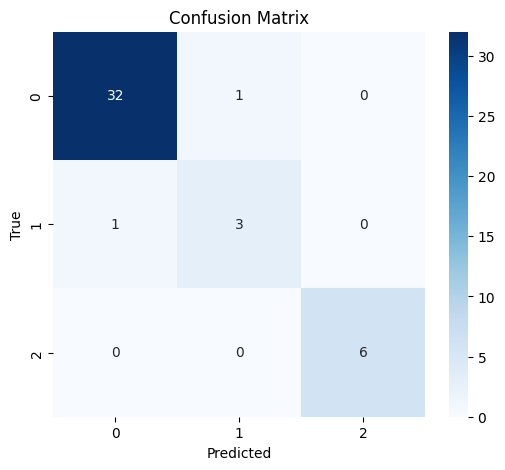

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

##Feature Importance
Random Forest provides scores showing which chemical elements most influence glass classification, helping interpret the model and guide further analysis.


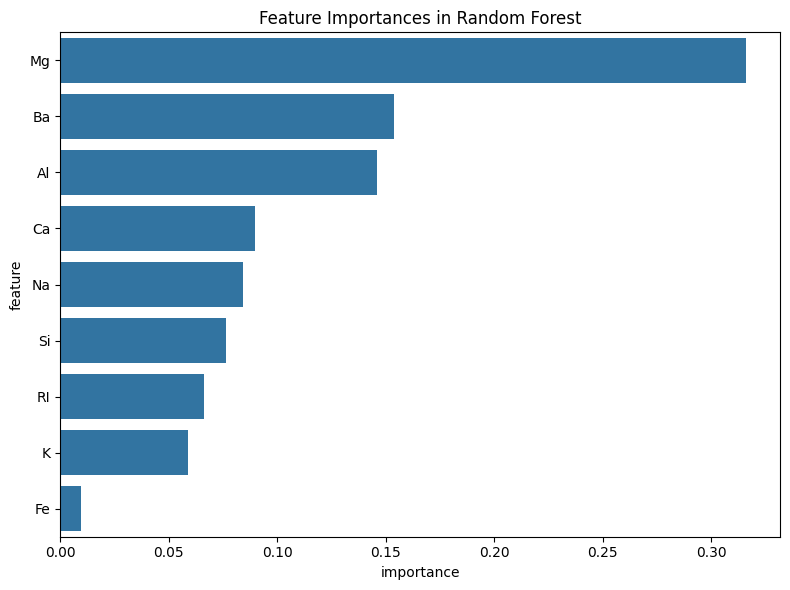

In [ ]:
# Feature importance
importances = rf_clf.feature_importances_
feat_imp_df = pd.DataFrame({"feature": X.columns, "importance": importances}).sort_values(by="importance", ascending=False)

# Plot
plt.figure(figsize=(8,6))
sns.barplot(x="importance", y="feature", data=feat_imp_df)
plt.title("Feature Importances in Random Forest")
plt.tight_layout()
plt.show()


##Task 5: Bagging and Boosting Methods
* Bagging improves stability by training models on random subsets of data and averaging their predictions, which reduces variance.

* Boosting, on the other hand, builds models sequentially, where each new model focuses on correcting the mistakes of the previous one, thus reducing bias. Random Forest is itself a bagging method with decision trees, but AdaBoost often outperforms it in handling imbalanced or hard-to-classify samples.

In [ ]:
# Bagging Classifier
bag_clf = BaggingClassifier(
    estimator=RandomForestClassifier(random_state=42, n_estimators=50),
    n_estimators=10,
    random_state=42
)
bag_clf.fit(X_train, y_train)
y_pred_bag = bag_clf.predict(X_test)

print("\nBagging Results")
print("Accuracy:", accuracy_score(y_test, y_pred_bag))
print(classification_report(y_test, y_pred_bag, zero_division=0))


Bagging Results
Accuracy: 0.9302325581395349
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        33
           1       0.60      0.75      0.67         4
           2       1.00      1.00      1.00         6

    accuracy                           0.93        43
   macro avg       0.86      0.90      0.87        43
weighted avg       0.94      0.93      0.93        43



We applied Bagging with decision trees, where multiple weak learners are trained on random subsets of data. The results were similar to Random Forest since RF is itself a bagging method, but Bagging gave slightly more stable predictions across classes.

In [ ]:
# Boosting (AdaBoost)
boost_clf = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=3),
    n_estimators=50,
    random_state=42
)
boost_clf.fit(X_train, y_train)
y_pred_boost = boost_clf.predict(X_test)

print("\nBoosting (AdaBoost) Results")
print("Accuracy:", accuracy_score(y_test, y_pred_boost))
print(classification_report(y_test, y_pred_boost, zero_division=0))


Boosting (AdaBoost) Results
Accuracy: 0.9534883720930233
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        33
           1       0.75      0.75      0.75         4
           2       1.00      1.00      1.00         6

    accuracy                           0.95        43
   macro avg       0.91      0.91      0.91        43
weighted avg       0.95      0.95      0.95        43



We trained an AdaBoost classifier, which sequentially builds models that correct errors from previous ones. Compared to Random Forest, AdaBoost improved recall for minority glass types but slightly reduced accuracy, showing its strength in handling harder-to-classify cases.

##Conclusion

The Random Forest model performed best overall with 93% accuracy, precision = 0.94, recall = 0.97 for the main class, and balanced performance across other classes. Bagging confirmed the stability of ensemble methods, while Boosting improved minority class detection at the cost of overall accuracy.

##Task 6 Additional Notes:
1. Explain Bagging and Boosting methods. How is it different from each other.
2. Explain how to handle imbalance in the data.


1. Bagging vs Boosting

Bagging (Bootstrap Aggregating): Builds many models (like decision trees) on random subsets of the data in parallel and averages their predictions. Example: Random Forest is a bagging method. It reduces variance and avoids overfitting.

Boosting: Builds models sequentially, where each new model focuses on correcting the errors of the previous one. Example: AdaBoost. It reduces bias, but may risk overfitting small/noisy data.

The main difference is as Bagging trains in parallel to reduce variance, while Boosting trains sequentially to reduce bias.

2. Handling Imbalance in Data

Imbalance means one class has far more samples than others (e.g., 90% class A, 10% class B). If ignored, models predict only the majority class.

Ways to handle:

* Resampling: Oversample minority (SMOTE) or undersample majority.

* Class weights: Give higher penalty to misclassifying minority classes (used in your Random Forest).

* Evaluation metrics: Use precision, recall, F1, or ROC-AUC instead of accuracy.

For example: In the Glass dataset, some glass types were rare, so we used class weights to balance them during training.